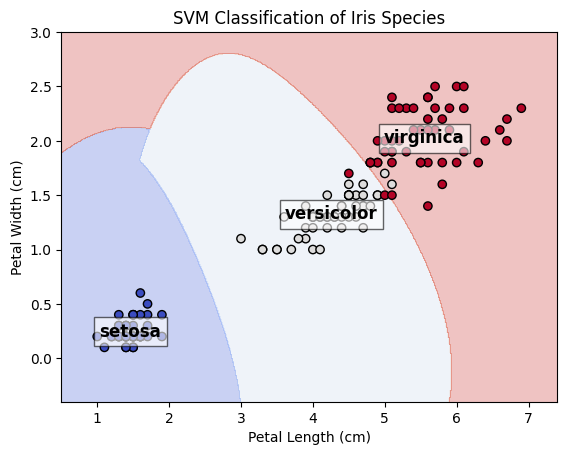

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np

# 1. Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Use petal length and width
y = iris.target        # Species (0 = setosa, 1 = versicolor, 2 = virginica)

# 2. Create an SVM model with an RBF kernel
model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
model.fit(X, y)

# 3. Visualize decision boundaries
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

#Label
species_names = iris.target_names
for i, species in enumerate(species_names):
    x_text = X[y == i, 0].mean()
    y_text = X[y == i, 1].mean()
    plt.text(x_text, y_text, species, fontsize=12, weight='bold',
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("SVM Classification of Iris Species")
plt.show()